In [15]:
import pandas as pd
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
from ortools.linear_solver import pywraplp
import math

In [17]:
import matplotlib.pyplot as plt

def plot_bin_packing_solution(data, x, y):
    # Calculate the total weight for bins that are used.
    bin_weights = [sum(data["weights"][i] * x[(i, j)].solution_value() for i in data["items"]) if y[j].solution_value() > 0 else 0 for j in data["bins"]]

    # Filter out the bins that are not used to avoid cluttering the plot.
    used_bins = [j for j in data["bins"] if y[j].solution_value() > 0]
    used_bin_weights = [bin_weights[j] for j in used_bins]

    plt.figure(figsize=(10, 6))
    plt.bar(used_bins, used_bin_weights, color='purple')
    plt.title('Bin Packing Solution')
    plt.xlabel('Bins')
    plt.ylabel('Total Weight')
    plt.xticks(used_bins)
    plt.show()

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
Bin number 0
  Items packed: [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
  Total weight: 1756

Bin number 1
  Items packed: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 4

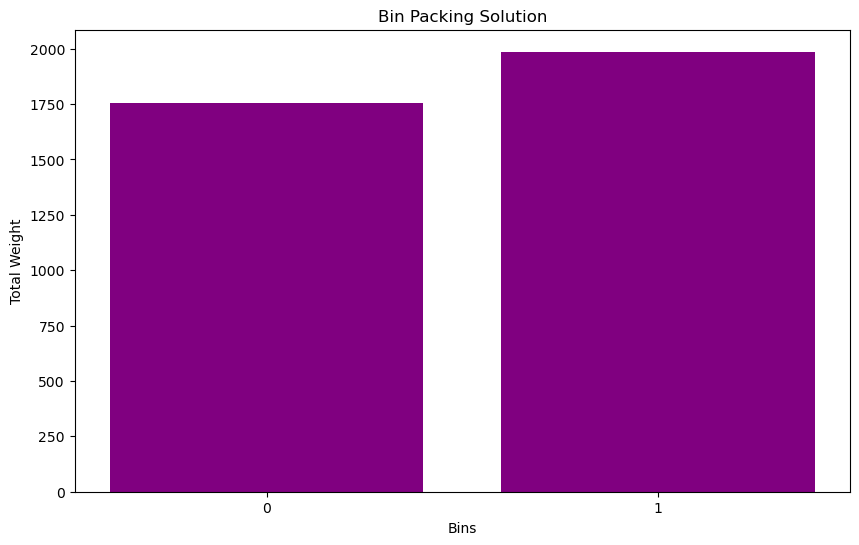

In [19]:
trucks = [2000,2000]
weights = []
N_items = [72,29,15,22]
for i in N_items:
    for j in range(i):
        if i == 72:
            weights.append(20.5)
        elif i == 29:
            weights.append(20.4)
        elif i == 15:
            weights.append(87.48)
        else:
            weights.append(16.5)

pesi = []
for i in weights:
    pesi.append(int(i))
print(pesi)

def create_data_model():
    data = {}
    data["weights"] = weights
    data["items"] = list(range(len(weights)))
    data["bins"] = list(range(len(trucks)))
    data["bin_capacity"] = trucks
    return data

data = create_data_model()

# 2. create the solver
solver = pywraplp.Solver.CreateSolver("SCIP")

# 3. declare the decision variables. xij if item i is packen in bin j. yj is bin j is used.
x = {}
for i in data["items"]:
      for j in data["bins"]:
            x[(i, j)] = solver.IntVar(0, 1, "x_%i_%i" % (i, j))

y = {}
for j in data["bins"]:
        y[j] = solver.IntVar(0, 1, "y[%i]" % j)

# 4. insert the constraints
for i in data["items"]:
        solver.Add(sum(x[i, j] for j in data["bins"]) == 1) # each item in only one bin

for j in data["bins"]:
        solver.Add(
            sum(x[(i, j)] * data["weights"][i] for i in data["items"])
            <= y[j] * data["bin_capacity"][j]) # items in each bins cannot exceed their capacity

# 5. insert the objective funtion
solver.Minimize(solver.Sum([y[j] for j in data["bins"]]))

# 6. solve the problem
status = solver.Solve()

# 7. print the results
if status == pywraplp.Solver.OPTIMAL:
        num_bins = 0
        for j in data["bins"]:
            if y[j].solution_value() == 1:
                bin_items = []
                bin_weight = 0
                for i in data["items"]:
                    if x[i, j].solution_value() > 0:
                        bin_items.append(i)
                        bin_weight += data["weights"][i]
                if bin_items:
                    num_bins += 1
                    print("Bin number", j)
                    print("  Items packed:", bin_items)
                    print("  Total weight:", math.floor(bin_weight))
                    print()
        print()
        print("Number of bins used:", num_bins)
        print("Time = ", solver.WallTime(), " milliseconds")
else:
        print("The problem does not have an optimal solution.")
plot_bin_packing_solution(data,x,y)


Bin number 0
  Items packed: [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103]
  Total weight: 1754

Bin number 1
  Items packed: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102]
  Total weight: 885


Number of bins used: 2
Time =  21  milliseconds


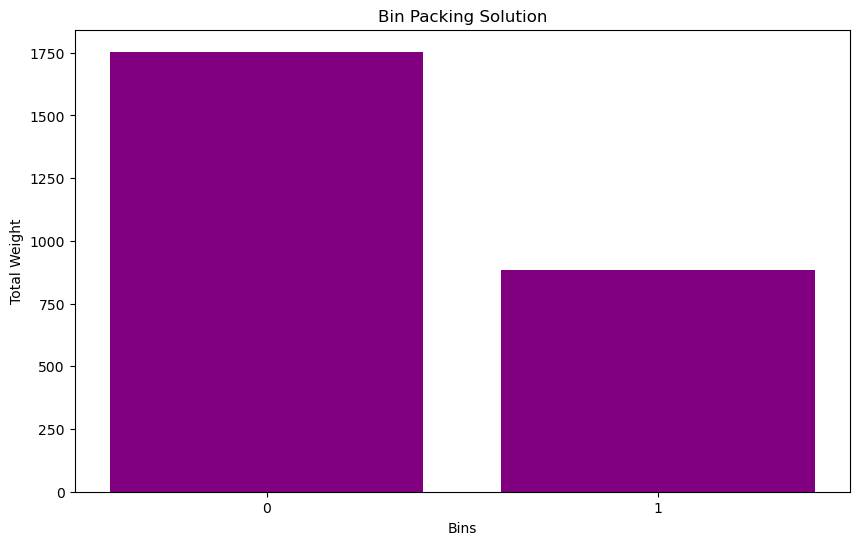

In [4]:
def create_data_model():
    trucks = [2000,2000]
    data = {}
    weights = []
    N_items = [58,26,9,11]
    for i in N_items:
        for j in range(i):
            if i == 58:
                weights.append(20.5)
            elif i == 26:
                weights.append(20.4)
            elif i == 9:
                weights.append(87.48)
            else:
                weights.append(16.5)
    data["weights"] = [int(i) for i in weights]
    data["items"] = list(range(len(weights)))
    data["bins"] = list(range(len(trucks)))
    data["bin_capacity"] = trucks
    return data

data = create_data_model()

# 2. create the solver
solver = pywraplp.Solver.CreateSolver("SCIP")

# 3. declare the decision variables. xij if item i is packen in bin j. yj is bin j is used.
x = {}
for i in data["items"]:
      for j in data["bins"]:
            x[(i, j)] = solver.IntVar(0, 1, "x_%i_%i" % (i, j))

y = {}
for j in data["bins"]:
        y[j] = solver.IntVar(0, 1, "y[%i]" % j)

# 4. insert the constraints
for i in data["items"]:
        solver.Add(sum(x[i, j] for j in data["bins"]) == 1) # each item in only one bin

for j in data["bins"]:
        solver.Add(
            sum(x[(i, j)] * data["weights"][i] for i in data["items"])
            <= y[j] * data["bin_capacity"][j]) # items in each bins cannot exceed their capacity

# 5. insert the objective funtion
solver.Minimize(solver.Sum([y[j] for j in data["bins"]]))

# 6. solve the problem
status = solver.Solve()

# 7. print the results
if status == pywraplp.Solver.OPTIMAL:
        num_bins = 0
        for j in data["bins"]:
            if y[j].solution_value() == 1:
                bin_items = []
                bin_weight = 0
                for i in data["items"]:
                    if x[i, j].solution_value() > 0:
                        bin_items.append(i)
                        bin_weight += data["weights"][i]
                if bin_items:
                    num_bins += 1
                    print("Bin number", j)
                    print("  Items packed:", bin_items)
                    print("  Total weight:", bin_weight)
                    print()
        print()
        print("Number of bins used:", num_bins)
        print("Time = ", solver.WallTime(), " milliseconds")
else:
        print("The problem does not have an optimal solution.")
plot_bin_packing_solution(data,x,y)